By: Lucas Liew of AlgoTrading101 <br>
Guide: https://algotrading101.com/learn/sentiment-analysis-with-python-finance/

In [47]:
import pandas as pd

# If txt/csv file is in the same folder as this notebook
df1 = pd.read_csv("AAP-analysis.csv", encoding='windows-1250', header=None)
df1.columns = ['Title', 'Date']
df1

,Title,Date
0,Advance Auto Parts Can Drive Higher Even In A ...,"Seeking ProfitsSat, Oct. 153 Comments"
1,Advance Auto Parts: Buy The Drop On This Divid...,"Gen AlphaFri, Aug. 265 Comments"
2,Advance Auto Parts: The Current Environment Ma...,"Ben HowardSat, Jul. 02"
3,Advance Auto Parts: Old Vehicles Require Conti...,"Justin PurohitMon, May 30"
4,Stocks To Watch: Investors Eye Catching Fallin...,"SA Stocks To WatchSat, May 2133 Comments"
5,Holding On To Advanced Auto Parts Is Presently...,"Stocks TelegraphWed, May 111 Comment"
6,"Advance Auto Parts: Strong DIFM Presence, Marg...","GS AnalyticsWed, Feb. 23"
7,Advance Auto Parts: Buy The Dip In This Great ...,"Quad 7 CapitalTue, Feb. 153 Comments"
8,Advance Auto Parts: Still Expensive And Still ...,"Daniel JonesTue, Dec. 07, 20212 Comments"
9,Advance Auto Parts: The Growth Story Continues,"Quad 7 CapitalWed, Aug. 25, 20213 Comments"


In [48]:
df1['Date'][0] = 'Dec. 9'
df1.head()

,Title,Date
0,Advance Auto Parts Can Drive Higher Even In A ...,Dec. 9
1,Advance Auto Parts: Buy The Drop On This Divid...,"Gen AlphaFri, Aug. 265 Comments"
2,Advance Auto Parts: The Current Environment Ma...,"Ben HowardSat, Jul. 02"
3,Advance Auto Parts: Old Vehicles Require Conti...,"Justin PurohitMon, May 30"
4,Stocks To Watch: Investors Eye Catching Fallin...,"SA Stocks To WatchSat, May 2133 Comments"


In [49]:
from datetime import datetime
import re

newDateList = [] # create a list to store the cleaned dates

for dateOfArticles in df1['Date']: # loop every row in the "Date" column
    match = re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}|May\s\d{1,2}\,\s\d{4}|\w{3}\.\s\d{1,2}|May\s\d{1,2}', 
                      dateOfArticles)

    if re.search(r'\w{3}\.\s\d{1,2}\,\s\d{4}|\w{3}\s\d{1,2}\,\s\d{4}',match[0]):
        fulldate = match[0] # don't append year to string
    else:
        fulldate = match[0] + ", 2019" # append year to string
    
    for fmt in ('%b. %d, %Y', '%b %d, %Y'):
        try:
            newDate = datetime.strptime(fulldate, fmt).date()
            break # if format is correct, don't test any other formats
        except ValueError:
            pass
        
    newDateList.append(newDate) # add new date to the list

if(len(newDateList) != df1.shape[0]):
    print("Error: Rows don't match")
else:
    df1['New Date'] = newDateList # add the list to our original dataframe

df1

,Title,Date,New Date
0,Advance Auto Parts Can Drive Higher Even In A ...,Dec. 9,2019-12-09
1,Advance Auto Parts: Buy The Drop On This Divid...,"Gen AlphaFri, Aug. 265 Comments",2019-08-26
2,Advance Auto Parts: The Current Environment Ma...,"Ben HowardSat, Jul. 02",2019-07-02
3,Advance Auto Parts: Old Vehicles Require Conti...,"Justin PurohitMon, May 30",2019-05-30
4,Stocks To Watch: Investors Eye Catching Fallin...,"SA Stocks To WatchSat, May 2133 Comments",2019-05-21
5,Holding On To Advanced Auto Parts Is Presently...,"Stocks TelegraphWed, May 111 Comment",2019-05-11
6,"Advance Auto Parts: Strong DIFM Presence, Marg...","GS AnalyticsWed, Feb. 23",2019-02-23
7,Advance Auto Parts: Buy The Dip In This Great ...,"Quad 7 CapitalTue, Feb. 153 Comments",2019-02-15
8,Advance Auto Parts: Still Expensive And Still ...,"Daniel JonesTue, Dec. 07, 20212 Comments",2021-12-07
9,Advance Auto Parts: The Growth Story Continues,"Quad 7 CapitalWed, Aug. 25, 20213 Comments",2021-08-25


In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for headline in df1['Title']:
    pol_score = sia.polarity_scores(headline)
    pol_score['headline'] = headline
    results.append(pol_score)

results

[{'neg': 0.259,
  'neu': 0.741,
  'pos': 0.0,
  'compound': -0.4215,
  'headline': 'Advance Auto Parts Can Drive Higher Even In A Recession'},
 {'neg': 0.189,
  'neu': 0.811,
  'pos': 0.0,
  'compound': -0.2732,
  'headline': 'Advance Auto Parts: Buy The Drop On This Dividend Grower'},
 {'neg': 0.0,
  'neu': 0.64,
  'pos': 0.36,
  'compound': 0.5423,
  'headline': 'Advance Auto Parts: The Current Environment May Spark Long-Term Growth'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Advance Auto Parts: Old Vehicles Require Continued Maintenance'},
 {'neg': 0.12,
  'neu': 0.677,
  'pos': 0.203,
  'compound': 0.2732,
  'headline': 'Stocks To Watch: Investors Eye Catching Falling Knives Vs. Oversold Values'},
 {'neg': 0.0,
  'neu': 0.846,
  'pos': 0.154,
  'compound': 0.25,
  'headline': 'Holding On To Advanced Auto Parts Is Presently The Way To Go'},
 {'neg': 0.0,
  'neu': 0.769,
  'pos': 0.231,
  'compound': 0.5106,
  'headline': 'Advance Auto Parts: Strong

In [51]:
df1['Score'] = pd.DataFrame(results)['compound']

In [52]:
df2 = df1.groupby(['New Date']).sum() # creates a daily score by summing the scores of the individual articles in each day

In [80]:
# Make sure csv file is in the same folder as this notebook
dfEodPrice = pd.read_csv("AAP.csv")
#dfEodPrice.head()
dfEodPrice.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3068,2022-10-12,169.279999,170.789993,167.520004,169.320007,169.320007,662900
3069,2022-10-13,166.839996,173.220001,165.979996,171.580002,171.580002,682000
3070,2022-10-14,172.479996,173.320007,168.199997,168.570007,168.570007,552200
3071,2022-10-17,170.699997,172.149994,169.110001,169.860001,169.860001,979900
3072,2022-10-18,173.229996,175.559998,172.399994,174.729996,174.729996,691100


In [81]:
dfEodPrice['Date'] = dfEodPrice['Date'].astype('datetime64[ns]') 
type(dfEodPrice['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [82]:
dfEodPrice2 = dfEodPrice.drop(['Open', 'High','Low','Close','Volume'], axis=1) # drop unwanted rows
dfEodPrice2.set_index('Date', inplace=True) # set Date coloumn as index

In [84]:
dfEodPrice2['Returns'] = dfEodPrice2['Adj Close']/dfEodPrice2['Adj Close'].shift(1) - 1 # calculate daily returns

In [85]:
df2['Score(1)'] = df2.shift(1)

ValueError: Columns must be same length as key

In [86]:
dfReturnsScore = pd.merge(dfEodPrice2[['Returns']], df2[['Score(1)']], 
                       left_index=True, right_index=True, how='left')
dfReturnsScore

,Returns,Score(1)
Date,,
2010-08-05,NaN,NaN
2010-08-06,-0.020791,NaN
2010-08-09,0.009668,NaN
2010-08-10,-0.003943,NaN
2010-08-11,-0.021489,NaN
...,...,...
2022-10-12,0.002724,NaN
2022-10-13,0.013347,NaN
2022-10-14,-0.017543,NaN


In [87]:
dfReturnsScore.fillna(0, inplace=True) 
# replace NaN with 0 permanently

dfReturnsScore

,Returns,Score(1)
Date,,
2010-08-05,0.000000,0.0
2010-08-06,-0.020791,0.0
2010-08-09,0.009668,0.0
2010-08-10,-0.003943,0.0
2010-08-11,-0.021489,0.0
...,...,...
2022-10-12,0.002724,0.0
2022-10-13,0.013347,0.0
2022-10-14,-0.017543,0.0


<AxesSubplot:xlabel='Score(1)'>

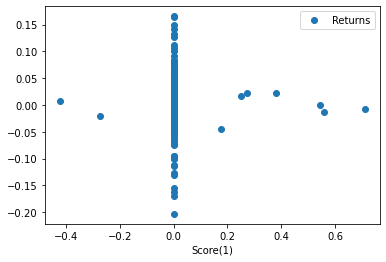

In [88]:
dfReturnsScore.plot(x="Score(1)", y="Returns", style="o")

In [89]:
dfReturnsScore2 = dfReturnsScore[(dfReturnsScore['Score(1)'] > 0.5) | 
                                 (dfReturnsScore['Score(1)'] < -0.5)]

In [90]:
dfReturnsScore2

,Returns,Score(1)
Date,,
2019-08-26,-0.000370,0.5423
2020-11-10,-0.007725,0.7096
2021-05-25,-0.013900,0.5574


<AxesSubplot:xlabel='Score(1)'>

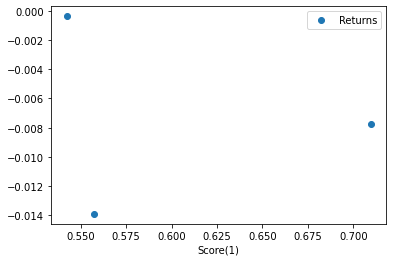

In [91]:
dfReturnsScore2.plot(x="Score(1)", y="Returns", style="o")

In [92]:
dfReturnsScore2['Returns'].corr(dfReturnsScore2['Score(1)'])

-0.1316292527827657